In [1]:
import pandas as pd
data=pd.read_csv('C:/Users/Gahyun/Desktop/crime.csv', encoding='cp1252')
print(data)

       INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP  \
0           I182070945           619               Larceny   
1           I182070943          1402             Vandalism   
2           I182070941          3410                 Towed   
3           I182070940          3114  Investigate Property   
4           I182070938          3114  Investigate Property   
...                ...           ...                   ...   
319068   I050310906-00          3125       Warrant Arrests   
319069   I030217815-08           111              Homicide   
319070   I030217815-08          3125       Warrant Arrests   
319071   I010370257-00          3125       Warrant Arrests   
319072       142052550          3125       Warrant Arrests   

                        OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0                        LARCENY ALL OTHERS      D14            808      NaN   
1                                 VANDALISM      C11            347      NaN   
2              

In [2]:
print(data.head(3))

  INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP  OFFENSE_DESCRIPTION  \
0      I182070945           619            Larceny   LARCENY ALL OTHERS   
1      I182070943          1402          Vandalism            VANDALISM   
2      I182070941          3410              Towed  TOWED MOTOR VEHICLE   

  DISTRICT REPORTING_AREA SHOOTING  OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  \
0      D14            808      NaN  2018-09-02 13:00  2018      9      Sunday   
1      C11            347      NaN   2018-08-21 0:00  2018      8     Tuesday   
2       D4            151      NaN  2018-09-03 19:27  2018      9      Monday   

   HOUR    UCR_PART       STREET        Lat       Long  \
0    13    Part One   LINCOLN ST  42.357791 -71.139371   
1     0    Part Two     HECLA ST  42.306821 -71.060300   
2    19  Part Three  CAZENOVE ST  42.346589 -71.072429   

                      Location  
0  (42.35779134, -71.13937053)  
1  (42.30682138, -71.06030035)  
2  (42.34658879, -71.07242943)  


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [4]:
data.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [5]:
#data=data.drop['OCCURRED_ON_DATE','Location']

<h2>년,월,요일별 범죄 발생 빈도</h2>

In [6]:
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

grouped1 = data.groupby('YEAR')
g1_size=grouped1.size()
print('연도별 범죄/사건 빈도수 평균:',round(g1_size.mean()), ' 중앙값:',round(g1_size.median()))

연도별 범죄/사건 빈도수 평균: 79768  중앙값: 82400


<BarContainer object of 4 artists>


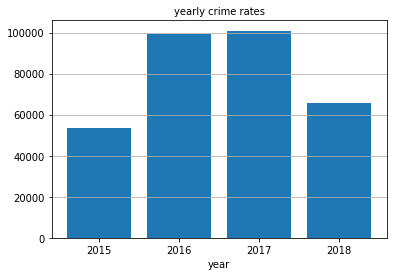

In [7]:
x=['2015','2016','2017','2018']
g1=plt.bar(x,g1_size)
plt.title('yearly crime rates',fontsize=10)
plt.xlabel('year')
plt.grid(axis='y')
print(g1)

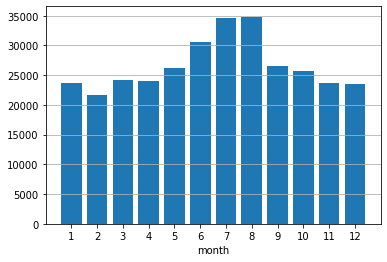

In [8]:
grouped2= data.groupby('MONTH')
g2_size=grouped2.size()
plt.bar(g2_size.index,g2_size)
plt.xticks(np.arange(1,13,1))
plt.xlabel('month')
plt.grid(axis='y')


In [9]:
print('월별 범죄/사건 빈도수 평균:',round(g2_size.mean()), ' 중앙값:',round(g2_size.median()))
print(g2_size)


월별 범죄/사건 빈도수 평균: 26589  중앙값: 24942
MONTH
1     23610
2     21653
3     24146
4     24086
5     26199
6     30568
7     34556
8     34823
9     26543
10    25737
11    23675
12    23477
dtype: int64


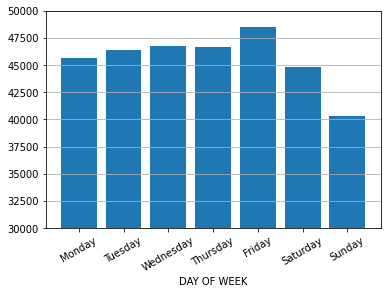

In [67]:
grouped3=data.groupby('DAY_OF_WEEK')
g3_size=grouped3.size()
x=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
y=[45679,46383,46729,46656,48495,44818,40313]
plt.bar(x,y)
plt.xticks(rotation=30)
plt.ylim([30000,50000])
plt.xlabel('DAY OF WEEK')
plt.grid(axis='y')

In [49]:
g3_size
print('요일별 범죄/사건 빈도수\n평균:',round(g3_size.mean()), ' 중앙값:',round(g3_size.median()), ' 최대값:',g3_size.max(), ' 최소값:',g3_size.min())


요일별 범죄/사건 빈도수
평균: 45582  중앙값: 46383  최대값: 48495  최소값: 40313


In [64]:
g3_size

DAY_OF_WEEK
Friday       48495
Monday       45679
Saturday     44818
Sunday       40313
Thursday     46656
Tuesday      46383
Wednesday    46729
dtype: int64

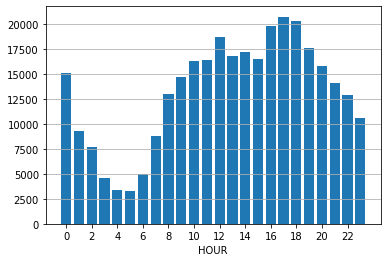

In [12]:
grouped=data.groupby('HOUR')
gs=grouped.size()
plt.bar(gs.index,gs)
plt.xticks(np.arange(0,24,2))
plt.xlabel('HOUR')
plt.grid(axis='y')

In [57]:
print('시간별 범죄/사건 발생 빈도\n평균:',round(gs.mean()),' 중앙값:',round(gs.median()),' 최대값:',gs.max(),' 최소값:', gs.min() )

시간별 범죄/사건 발생 빈도
평균: 13295  중앙값: 14923  최대값: 20763  최소값: 3311


<h2>범죄 분류</h2>
Larceny 절도죄, 도둑질
Drug violation 약물 남용
Simple assualt 단순 폭행
Verbal disputes 언쟁
Vandalism 사유재산 파괴
Medical assistance 의료 도움

In [14]:
grouped4=data.groupby('OFFENSE_CODE_GROUP')
grouped4.size().nlargest(10)

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18750
Other                              18075
Drug Violation                     16548
Simple Assault                     15826
Vandalism                          15415
Verbal Disputes                    13099
Towed                              11287
dtype: int64

<h2>UCR_PART별 분류</h2>

In [15]:
grouped5 = data.groupby('UCR_PART')
g5=grouped5.size()
g5

UCR_PART
Other           1232
Part One       61629
Part Three    158553
Part Two       97569
dtype: int64

([<matplotlib.patches.Wedge at 0x19bbdca2700>,
 [Text(1.0999190263996286, 0.013346736083911737, 'Other'),
  Text(0.8880274645754217, 0.6491588574145378, 'Part One'),
  Text(-1.0363565719523349, 0.3687343973257786, 'Part Three'),
  Text(0.6300287880829724, -0.9017004636722227, 'Part Two')],
 [Text(0.5999558325816154, 0.007280037863951856, '0.4%'),
  Text(0.48437861704113905, 0.3540866494988388, '19.3%'),
  Text(-0.5652854028830917, 0.20112785308678832, '49.7%'),
  Text(0.34365206622707584, -0.491836616548485, '30.6%')])

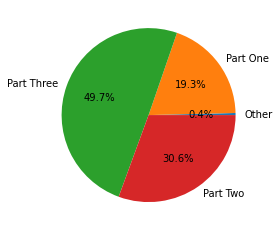

In [16]:
plt.pie(g5.values,labels=g5.index, autopct='%.1f%%')


In [17]:
data_p1=data[data['UCR_PART']=="Part One"]
data_p2=data[data['UCR_PART']=="Part Two"]
data_p3=data[data['UCR_PART']=="Part Three"]


<BarContainer object of 9 artists>

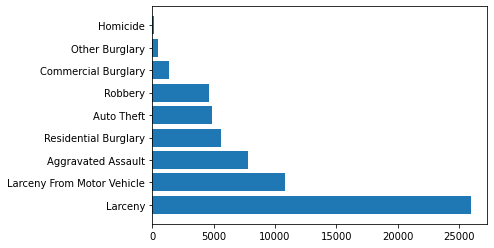

In [18]:
g_dp1=data_p1.groupby('OFFENSE_CODE_GROUP')
g_dp1=g_dp1.size()
plt.barh(g_dp1.nlargest(10).index,g_dp1.nlargest(9))

In [58]:
g_dp2=data_p2.groupby('OFFENSE_CODE_GROUP')
g_dp2=g_dp2.size()
print(g_dp2)
print(g_dp2.max(), g_dp2.min())

OFFENSE_CODE_GROUP
Ballistics                           981
Biological Threat                      2
Bomb Hoax                             75
Confidence Games                    3147
Counterfeiting                      1454
Criminal Harassment                  131
Disorderly Conduct                  2611
Drug Violation                     16548
Embezzlement                         296
Evading Fare                         407
Explosives                            13
Fire Related Reports                 126
Firearm Violations                  1777
Fraud                               5829
Gambling                               8
Harassment                          4007
Liquor Violation                    1052
Missing Person Reported               31
Offenses Against Child / Family      545
Operating Under the Influence        574
Other                              17089
Phone Call Complaints                 31
Prisoner Related Incidents           230
Prostitution                         2

<BarContainer object of 10 artists>

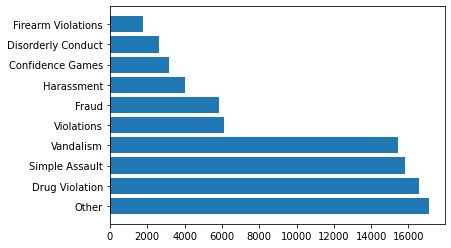

In [20]:
plt.barh(g_dp2.nlargest(10).index,g_dp2.nlargest(10))
#신용사기

In [21]:
g_dp3=data_p3.groupby('OFFENSE_CODE_GROUP')
g_dp3=g_dp3.size()

<BarContainer object of 10 artists>

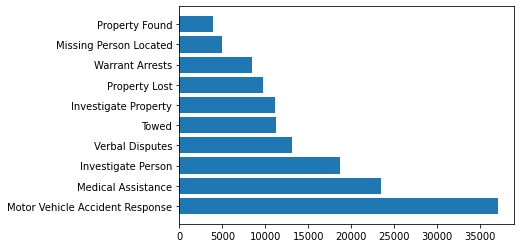

In [22]:
plt.barh(g_dp3.nlargest(10).index,g_dp3.nlargest(10))

<h3>파트별 지역 발생 빈도</h3>

In [23]:
d_sg=data.groupby(['STREET'])
d_sg.size().nlargest(10)

STREET
WASHINGTON ST        14194
BLUE HILL AVE         7794
BOYLSTON ST           7221
DORCHESTER AVE        5149
TREMONT ST            4796
MASSACHUSETTS AVE     4708
HARRISON AVE          4609
CENTRE ST             4383
COMMONWEALTH AVE      4134
HYDE PARK AVE         3470
dtype: int64

In [24]:
x=data.groupby(['UCR_PART','STREET'])
x.size().nlargest(10)

UCR_PART    STREET          
Part Three  WASHINGTON ST       5979
Part Two    WASHINGTON ST       4994
Part Three  BLUE HILL AVE       3647
Part One    WASHINGTON ST       3190
Part Two    BLUE HILL AVE       2745
Part One    BOYLSTON ST         2737
Part Three  DORCHESTER AVE      2404
            BOYLSTON ST         2357
            COMMONWEALTH AVE    2236
            CENTRE ST           2226
dtype: int64

<h2>지역별 범죄발생수</h2>

DISTRICT
A1     35717
A15     6505
A7     13544
B2     49945
B3     35442
C11    42530
C6     23460
D14    20127
D4     41915
E13    17536
E18    17348
E5     13239
dtype: int64


([<matplotlib.patches.Wedge at 0x19bc8b1c9d0>,
 [Text(1.0319356224444, 0.38093158326698096, 'A1'),
  Text(0.7884326442857201, 0.7670553861518914, 'A15'),
  Text(0.6216875778281514, 0.9074715177757186, 'A7'),
  Text(-0.03074086612179377, 1.0995703702583486, 'B2'),
  Text(-0.8431309736601027, 0.7064914445730871, 'B3'),
  Text(-1.0969460691467112, -0.08191044734085398, 'C11'),
  Text(-0.821241718624361, -0.731821043419022, 'C6'),
  Text(-0.43984884749530795, -1.008232607763233, 'D14'),
  Text(0.22165796624655792, -1.0774357270851194, 'D4'),
  Text(0.782554489231658, -0.7730514028079756, 'E13'),
  Text(0.9980612869897912, -0.46246477423938115, 'E18'),
  Text(1.0905639902530373, -0.14377128768767855, 'E5')],
 [Text(0.5628739758787636, 0.2077808636001714, '11.3%'),
  Text(0.4300541696103927, 0.41839384699194077, '2.1%'),
  Text(0.33910231517899164, 0.494984464241301, '4.3%'),
  Text(-0.016767745157342057, 0.5997656565045537, '15.7%'),
  Text(-0.4598896219964196, 0.38535896976713835, '11.2%')

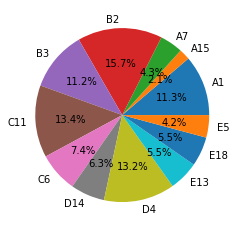

In [25]:
data['DISTRICT']=data['DISTRICT'].str[0]
g6=data.groupby('DISTRICT').size()
print(g6)
plt.pie(g6.values,labels=g6.index, autopct='%.1f%%')

<h2>지역번호 별 빈도수</h2>

In [62]:
x=data.groupby(['REPORTING_AREA'])
x.size().nlargest(10)
data['REPORTING_AREA'][15]

' '

In [27]:
x=data.groupby(['DISTRICT','REPORTING_AREA'])
x['DISTRICT'].size().nlargest(10)

DISTRICT  REPORTING_AREA
A1                          3443
D4                          3385
B2                          3384
A1        111               2316
C6        186               1915
B2        329               1874
D4        143               1775
A1        117               1755
D4        624               1751
A7        26                1738
Name: DISTRICT, dtype: int64

<h3>파트에 따른 지역별 빈도수</h3>

In [28]:
x=data.groupby(['UCR_PART','DISTRICT'])
x.size()

UCR_PART    DISTRICT
Other       A1             69
            A15            24
            A7             76
            B2            236
            B3            168
            C11           195
            C6            118
            D14            59
            D4            133
            E13            51
            E18            60
            E5             32
Part One    A1           8535
            A15          1246
            A7           2202
            B2           8803
            B3           4997
            C11          6737
            C6           4502
            D14          3940
            D4          12411
            E13          3563
            E18          2601
            E5           1874
Part Three  A1          16004
            A15          3435
            A7           6861
            B2          24582
            B3          19071
            C11         21953
            C6          11602
            D14         10833
            D4     

Text(0.5, 1.0, 'part1 crime rate')

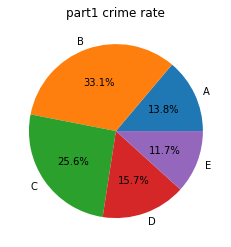

In [29]:
x1=[169,404,313,192,143]
x2=[11983,13800,11239,16351,8038]
x3=[26300,46353,33555,28297,25726]
x4=[17309,27501,20862,17186,14197]
y=['A','B','C','D','E']
p1=plt.pie(x1,labels=y, autopct='%.1f%%')
plt.title('part1 crime rate')


Text(0.5, 1.0, 'part2 crime rate')

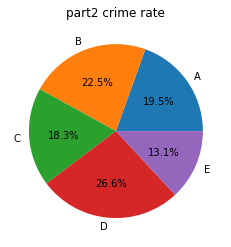

In [30]:
p2=plt.pie(x2,labels=y, autopct='%.1f%%')
plt.title('part2 crime rate')

Text(0.5, 1.0, 'part3 crime rate')

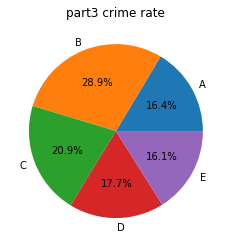

In [31]:
p3=plt.pie(x3,labels=y, autopct='%.1f%%')
plt.title('part3 crime rate')

<h3>파트별 shooting횟수</h3>

In [32]:
Shootingdata=data[data['SHOOTING']=='Y']
ShootingG=Shootingdata.groupby('UCR_PART').size()
ShootingG
df=pd.DataFrame({'전체':[61629,97569,158553,1232],'shooting':[663,184,166,1],'shooting 비율':[663/61629,184/97569,166/158553,1/1232]},index=['p1','p2','p3','other'])
print(df)

           전체  shooting  shooting 비율
p1      61629       663     0.010758
p2      97569       184     0.001886
p3     158553       166     0.001047
other    1232         1     0.000812


<h3>위도 경도</h3>

In [33]:
print(data_p1['Lat'].mean())
print(data_p1['Long'].mean())
print(data_p1['Long'].std())

print(data_p2['Lat'].mean())
print(data_p2['Long'].mean())
print(data_p2['Long'].std())

print(data_p3['Lat'].mean())
print(data_p3['Long'].mean())
print(data_p3['Long'].std())

42.24076076621939
-70.94204111445757
3.1303930467994943
42.20739783610951
-70.89685738241448
3.5956764836348216
42.20755368541903
-70.90085430376313
3.576218498250383


In [34]:
#이상치 확인
v1=data['Lat'].mean()
v2=data['Lat'].max()
v3=data['Lat'].min()

v4=data['Long'].mean()
v5=data['Long'].max()
v6=data['Long'].min()

v7=data['Lat'].std()
v8=data['Long'].std()

df=pd.DataFrame({'mean':[v1,v4],'max':[v2,v5],'min':[v3,v6], 'std':[v7,v8]},index=['Lat','Long'])
print(df)

           mean        max        min       std
Lat   42.214381  42.395042  -1.000000  2.159766
Long -70.908272  -1.000000 -71.178674  3.493618


Text(0, 0.5, 'longitude')

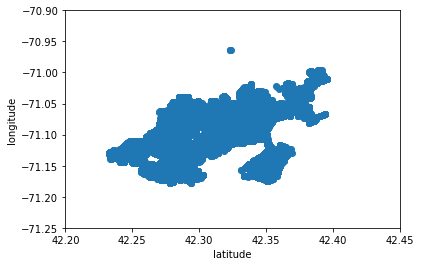

In [35]:
plt.xlim([42.2,42.45])
plt.ylim([-71.25,-70.9])
plt.scatter(data['Lat'],data['Long'])
plt.xlabel('latitude')
plt.ylabel('longitude')


<h3>그룹별 연도 범죄수</h3>전체 연도별 범죄수 그래프와 상이하다

Text(0, 0.5, 'part1 crime frequency')

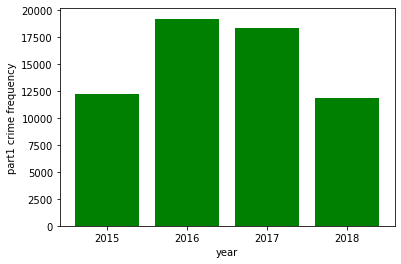

In [36]:

X1=data_p1.groupby('YEAR')
X1.size()
x=['2015','2016','2017','2018']
plt.bar(x,X1.size(),color='green')
plt.xlabel('year')
plt.ylabel('part1 crime frequency')

Text(0, 0.5, 'part2 crime frequency')

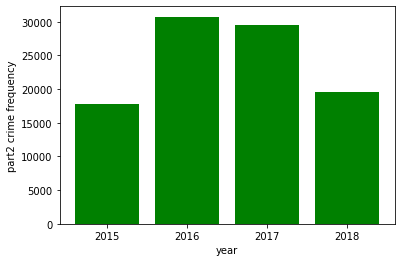

In [37]:
X2=data_p2.groupby('YEAR')
X2.size()
x=['2015','2016','2017','2018']
plt.bar(x,X2.size(),color='green')
plt.xlabel('year')
plt.ylabel('part2 crime frequency')

Text(0, 0.5, 'part3 crime frequency')

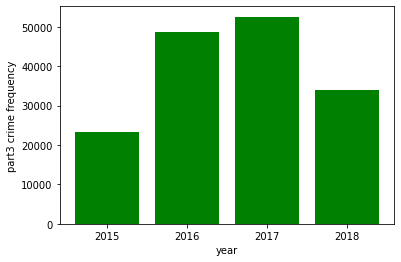

In [38]:
X3=data_p3.groupby('YEAR')
X3.size()
x=['2015','2016','2017','2018']
plt.bar(x,X3.size(),color='green')
plt.xlabel('year')
plt.ylabel('part3 crime frequency')

Text(0, 0.5, 'p1 crime frequency')

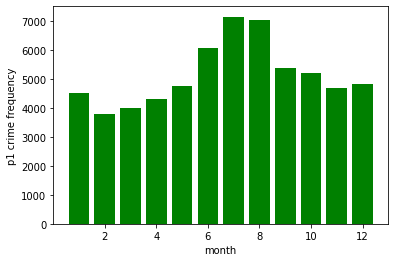

In [74]:
x=data_p1.groupby('MONTH').size()
plt.bar(x.index,x,color='green')
plt.xlabel('month')
plt.ylabel('p1 crime frequency')




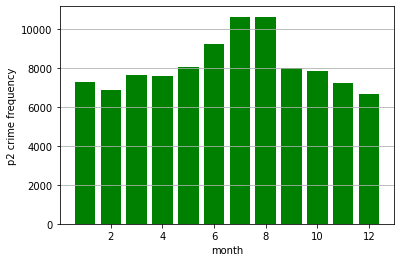

In [77]:
x=data_p2.groupby('MONTH').size()
plt.bar(x.index,x,color='green')
plt.xlabel('month')
plt.ylabel('p2 crime frequency')
plt.grid(axis='y')


Text(0, 0.5, 'p3 crime frequency')

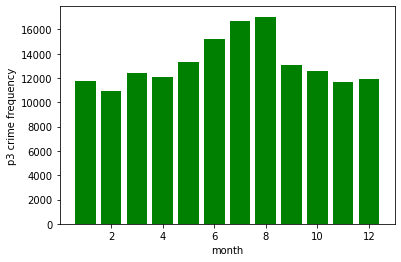

In [76]:
x=data_p3.groupby('MONTH').size()
plt.bar(x.index,x,color='green')
plt.xlabel('month')
plt.ylabel('p3 crime frequency')